# Context

This dataset contains all the incidents of crossing the border into the US as provided by the Bureau of Transportation Statistics, Govt. of the US. This dataset tells about the incoming counts into the US.
---

This data can be useful to predict the daily or weekly or monthly or annual traffic that's going to accumulate on the borders so that the authorities can be aware of the number beforehand.
---

Importing Libraries
---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# TRYING THIS LIBRARY OUT, LET'S SEE HOW THIS GOES...
import pandas.io.sql as psql
sql = psql.PandasSQL()

Creating Initial DF
---

In [20]:
df1 = pd.read_csv('input/Border_Crossing_Entry_Data.csv')
df1.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

# Data Analysis

Checking out what the data looks like
---

In [21]:
df1.head()

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


Changing the name of the "Measure" and "Value" columns so that the data is a little easier to understand
---

In [22]:
df1['Mode_of_Transportation'] = df1['Measure']
df1['Crossings'] = df1['Value']
df1 = df1.drop(columns=["Measure", "Value"])
df1.head()

,Port Name,State,Port Code,Border,Date,Mode_of_Transportation,Crossings
0,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Personal Vehicles,763
2,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Empty,412
3,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Truck Containers Full,122
4,Alcan,AK,3104,US-Canada Border,2/1/2020 00:00,Trucks,545


Checking the data types of each column
---

In [23]:
df1.dtypes

Port Name                 object
State                     object
Port Code                  int64
Border                    object
Date                      object
Mode_of_Transportation    object
Crossings                  int64
dtype: object

How many different ports/states/borders are we working with?
---

In [24]:
df1.nunique()

Port Name                   116
State                        15
Port Code                   117
Border                        2
Date                        290
Mode_of_Transportation       12
Crossings                 54814
dtype: int64

How many total crossings are in the dataset?
---

In [25]:
df1['Crossings'].sum()

10113428111

Answer: a lot
---

What's the breakdown of border crossings by state?
---

In [26]:
df1.groupby('State')['Crossings'].sum()

State
AK      14676856
AZ     918287879
CA    2602572970
ID      21833390
ME     236781464
MI     775410321
MN      99126985
MT      56139436
ND      78600964
NM      68560332
NY     854042599
OH           607
TX    3747879529
VT     118116868
WA     521397911
Name: Crossings, dtype: int64

Let's make a new column for the total border crossings by state
--

In [27]:
df1['Total_Crossings_By_State'] = df1.groupby('State')['Crossings'].transform('sum')
df1[['State', 'Total_Crossings_By_State']]

,State,Total_State_Crossings
0,AK,14676856
1,AK,14676856
2,AK,14676856
3,AK,14676856
4,AK,14676856
...,...,...
355506,ND,78600964
355507,CA,2602572970
355508,ME,236781464
355509,ND,78600964


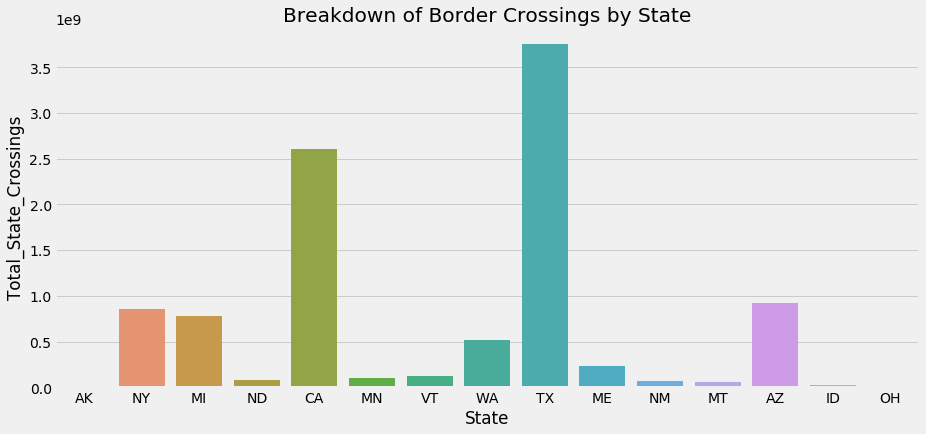

In [28]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df1['State'], y=df1['Total_Crossings_By_State'], ax=ax)
plt.tight_layout()
plt.title('Breakdown of Border Crossings by State')
plt.show()

Checking the breakdown of crossings by border
---

In [29]:
df1.groupby('Border')['Crossings'].sum()

Border
US-Canada Border    2776127401
US-Mexico Border    7337300710
Name: Crossings, dtype: int64

Making a new column for the total number of crossings in the dataset by border
--

In [36]:
df1['Total_Crossings_By_Border'] = df1.groupby('Border')['Crossings'].transform('sum')
df1['Total_Crossings_By_Border']

0         2776127401
1         2776127401
2         2776127401
3         2776127401
4         2776127401
             ...    
355506    2776127401
355507    7337300710
355508    2776127401
355509    2776127401
355510    2776127401
Name: Total_Crossings_By_Border, Length: 355511, dtype: int64

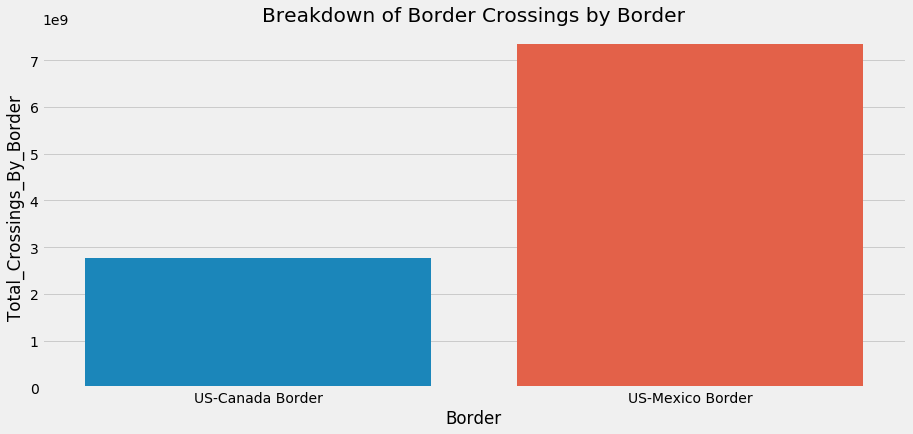

In [38]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df1['Border'], y=df1['Total_Crossings_By_Border'], ax=ax)
plt.tight_layout()
plt.title('Breakdown of Border Crossings by Border')
plt.show()

In [16]:
df1['Total_Crossings_By_Border'] = df1.groupby('Border')['Crossings'].transform('sum')
df1[['Border', 'Total_Crossings_By_Border']]

,Border,Total_Crossings_By_Border
0,US-Canada Border,2776127401
1,US-Canada Border,2776127401
2,US-Canada Border,2776127401
3,US-Canada Border,2776127401
4,US-Canada Border,2776127401
...,...,...
355506,US-Canada Border,2776127401
355507,US-Mexico Border,7337300710
355508,US-Canada Border,2776127401
355509,US-Canada Border,2776127401


Now let's look at the border crossing trends over the years
---

First, we're going to break down the "Date" column into 3 seperate columns for day/month/year
---

In [31]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1 = df1.drop(columns="Date")
df1.head()

,Port Name,State,Port Code,Border,Mode_of_Transportation,Crossings,Total_State_Crossings,Year,Month,Day
0,Alcan,AK,3104,US-Canada Border,Personal Vehicle Passengers,1414,14676856,2020,2,1
1,Alcan,AK,3104,US-Canada Border,Personal Vehicles,763,14676856,2020,2,1
2,Alcan,AK,3104,US-Canada Border,Truck Containers Empty,412,14676856,2020,2,1
3,Alcan,AK,3104,US-Canada Border,Truck Containers Full,122,14676856,2020,2,1
4,Alcan,AK,3104,US-Canada Border,Trucks,545,14676856,2020,2,1


To help us do a time series analysis, let's a make a new colummn for the number of crossings in the year for that given row.
---

In [32]:
df1['Total_Crossings_By_YearBy_Year'] = df1.groupby('Year')['Crossings'].transform('sum')

Let's plot a time series analysis of the crossings by year
---

# TODO:

Now that we know what the trend seems to be for overall crossings, now let's find a trend for each individual border.
--

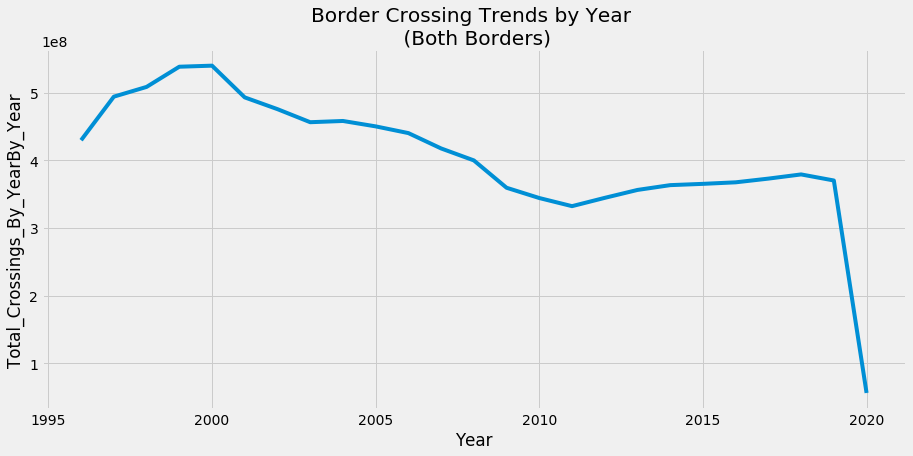

In [33]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.lineplot(x=df1['Year'], y=df1['Total_Crossings_By_YearBy_Year'], ax=ax)
plt.title('Border Crossing Trends by Year \n (Both Borders)')
plt.tight_layout()
plt.show()

# TODO:

Now I'm going to find the trends for each state with a port of entry.
---